In [40]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import pytesseract
import os
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata'

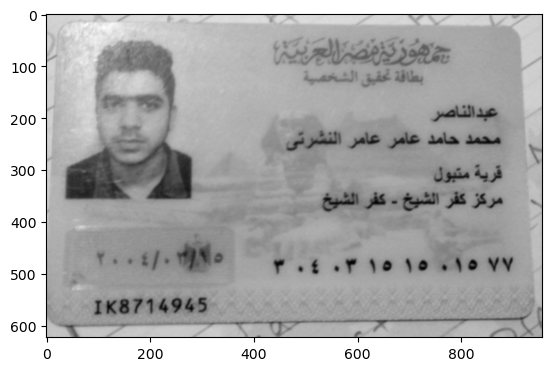

In [41]:
img = cv2.imread('id.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred,cmap='gray');

In [42]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

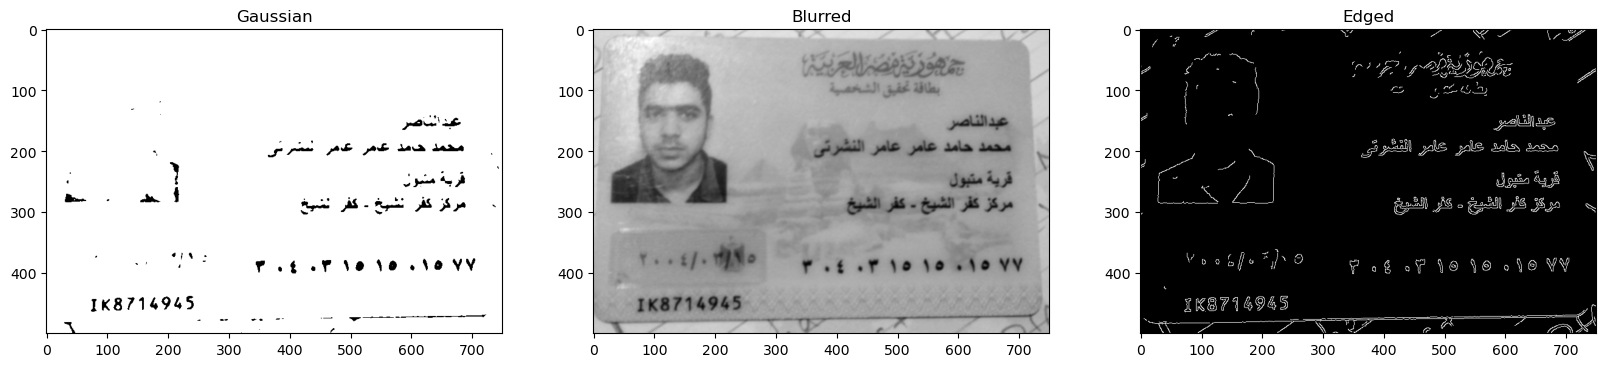

In [47]:
img = cv2.imread('id.jpg', 1)

img = cv2.resize(img, (750, 500))

# تحويل الصورة إلى تدرج الرمادي
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# تطبيق Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# تطبيق adaptiveThreshold
gaussian = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 41)

# تطبيق Canny Edge Detection
edged = cv2.Canny(gray, 100, 150)

# عرض الصور
plt.figure(figsize=(20, 12))
plt.subplot(131), plt.imshow(gaussian, cmap='gray'), plt.title('Gaussian')
plt.subplot(132), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(133), plt.imshow(edged, cmap='gray'), plt.title('Edged')
plt.show()


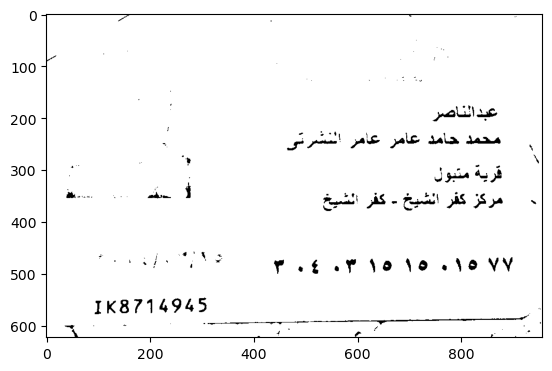

In [44]:
# Load the image
image = cv2.imread('id.jpg',1)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Apply noise reduction (e.g., Gaussian blur)
gaussian = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,91,41)

# Apply thresholding to make text more prominent
_, binary_image = cv2.threshold(gaussian, 0, 10, cv2.THRESH_BINARY)
plt.imshow(binary_image,cmap='gray')

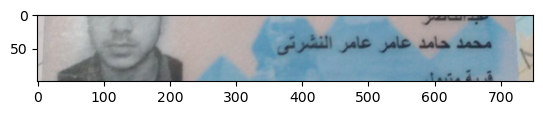

In [51]:
plt.imshow(img[int(img.shape[0]*0.3) : int(img.shape[0]*0.5)])

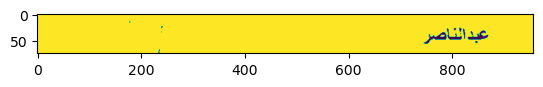

In [52]:
plt.imshow(binary_image[int(img.shape[0]*0.3) : int(img.shape[0]*0.45)])
     

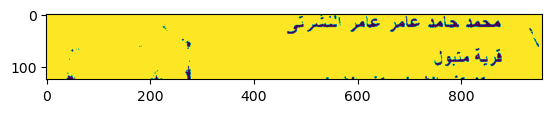

In [53]:
plt.imshow(binary_image[int(img.shape[0]*0.45) : int(img.shape[0]*0.7)])

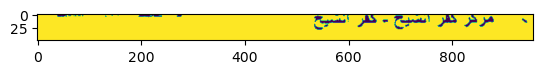

In [54]:
plt.imshow(binary_image[int(img.shape[0]*0.7) : int(img.shape[0]*0.8)])

ValueError: Region id could not be extracted.

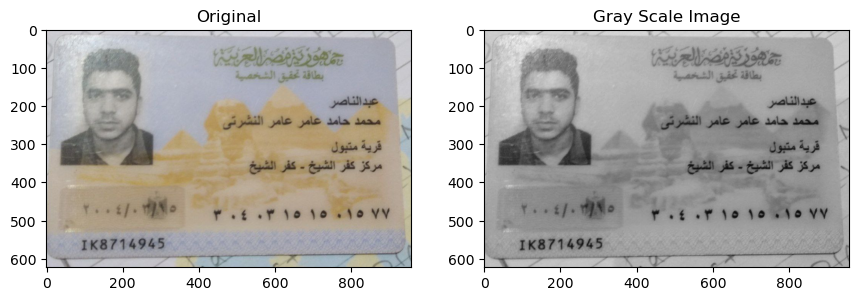

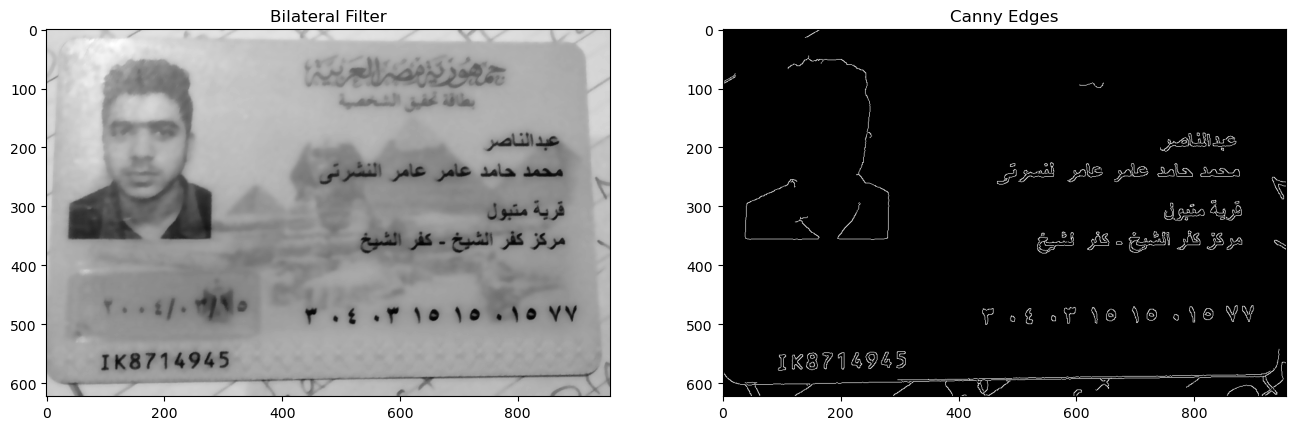

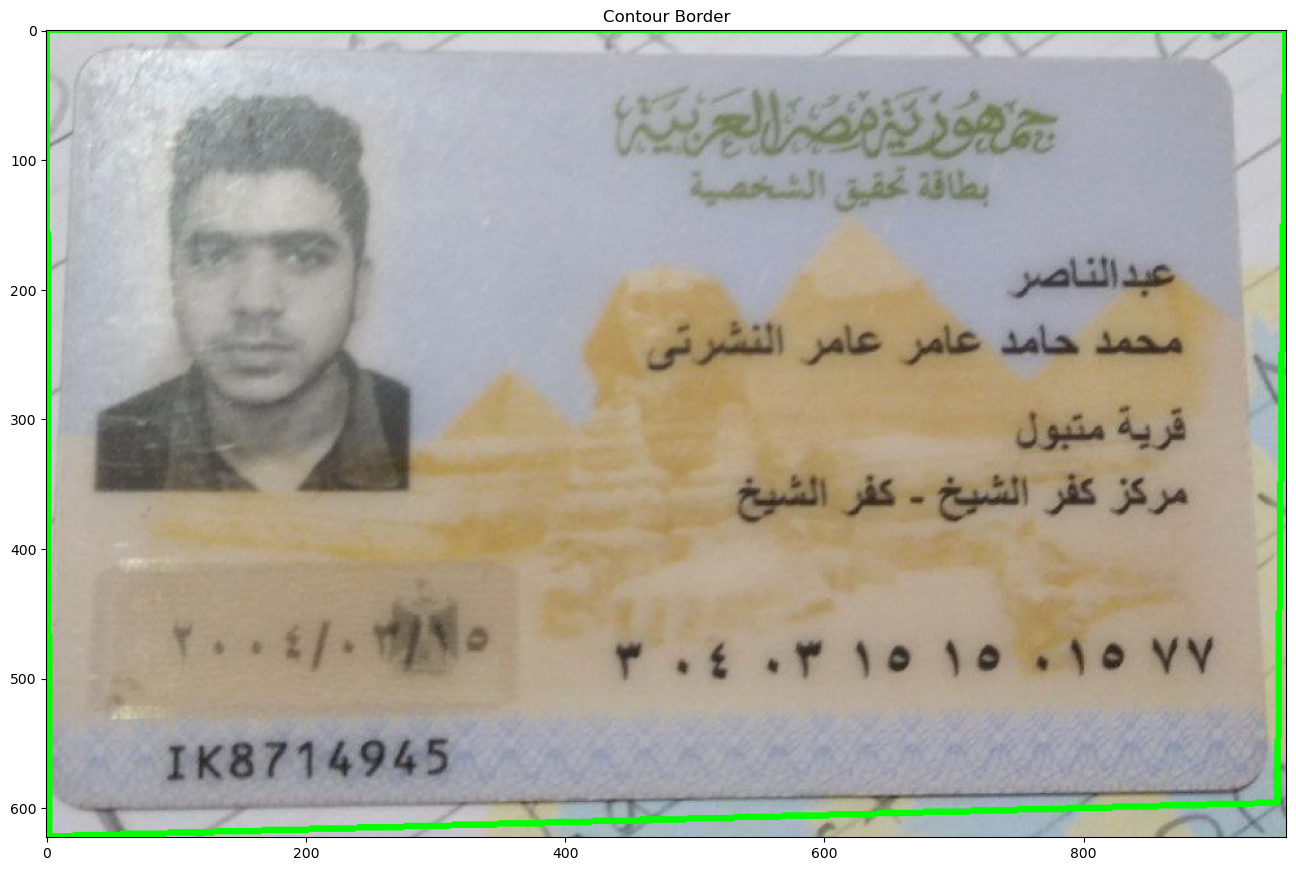

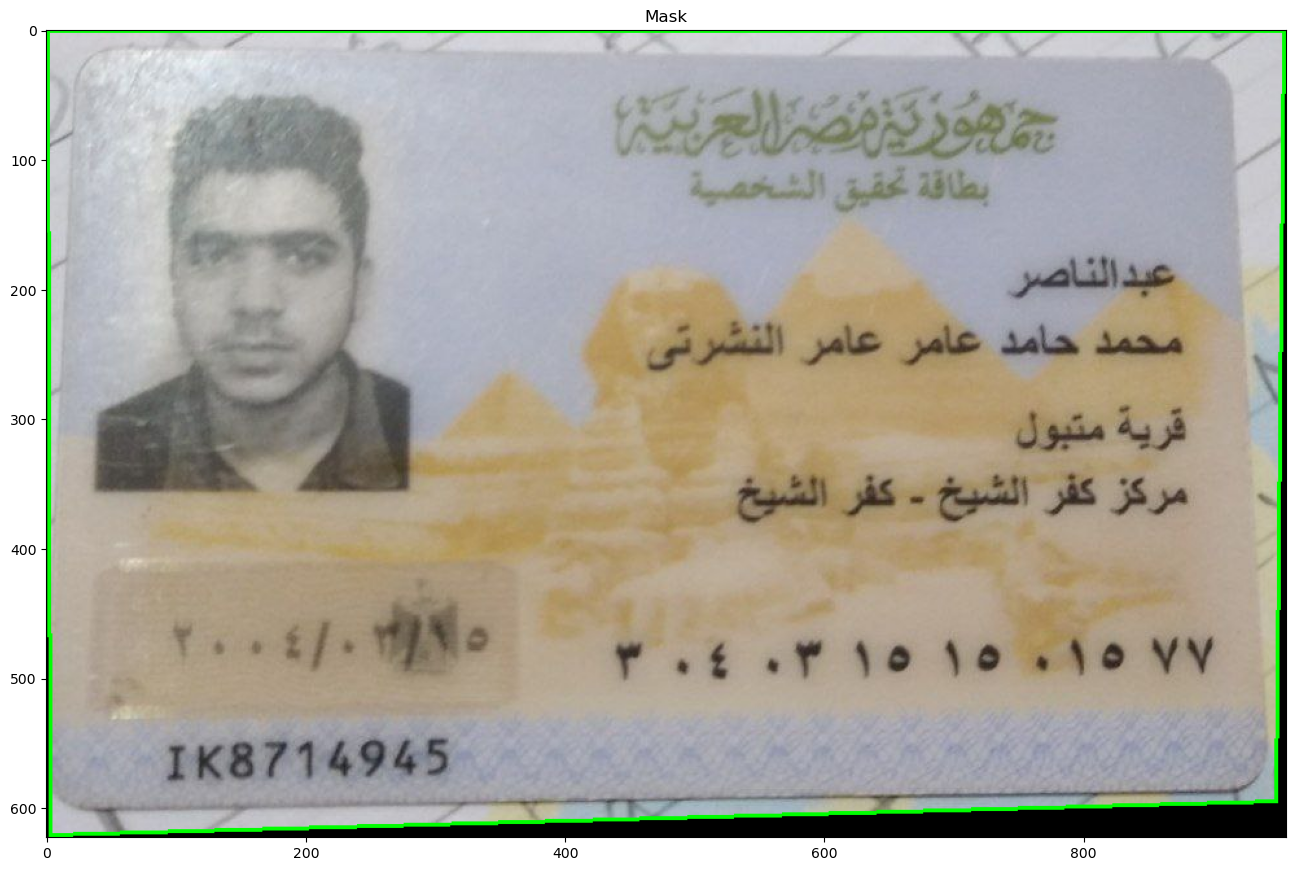

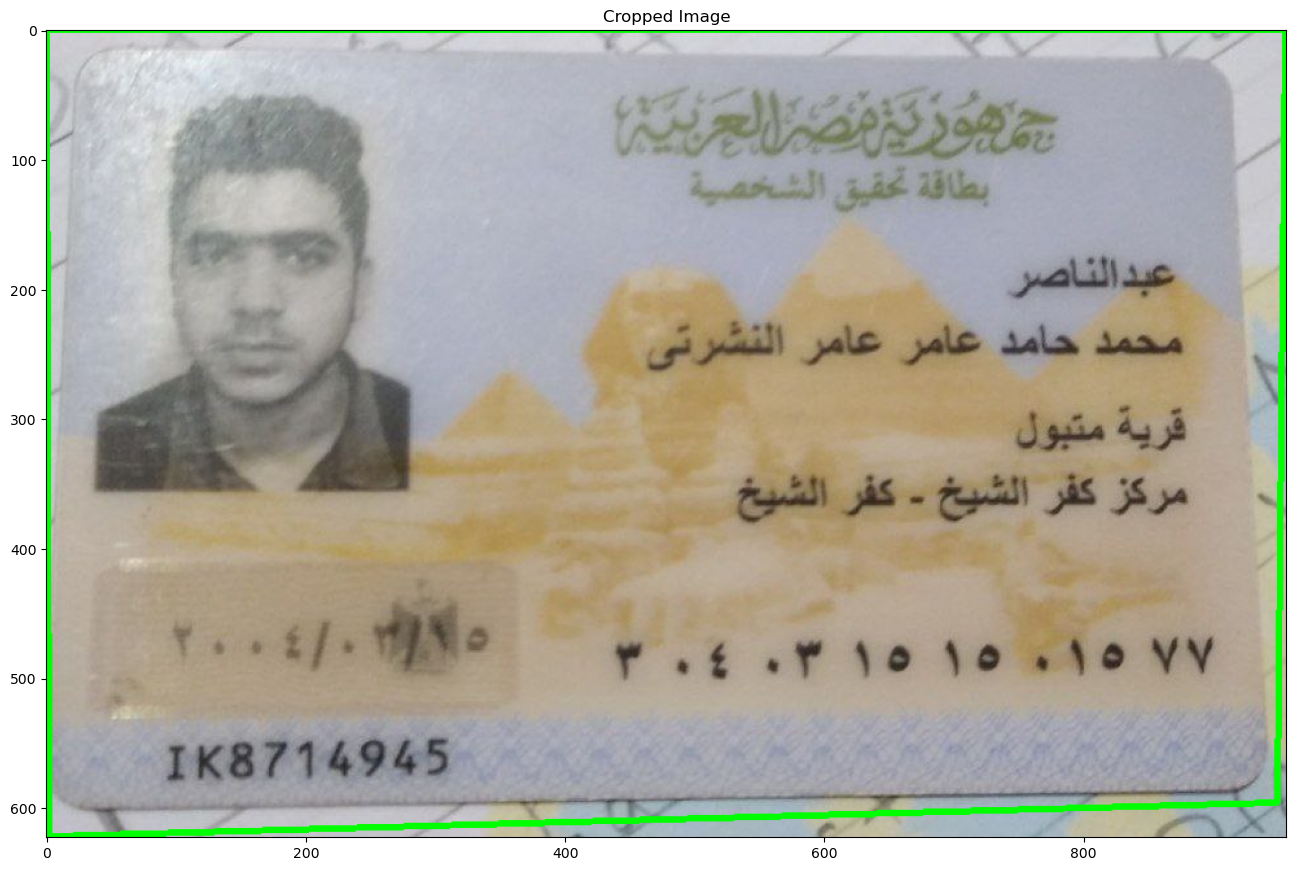

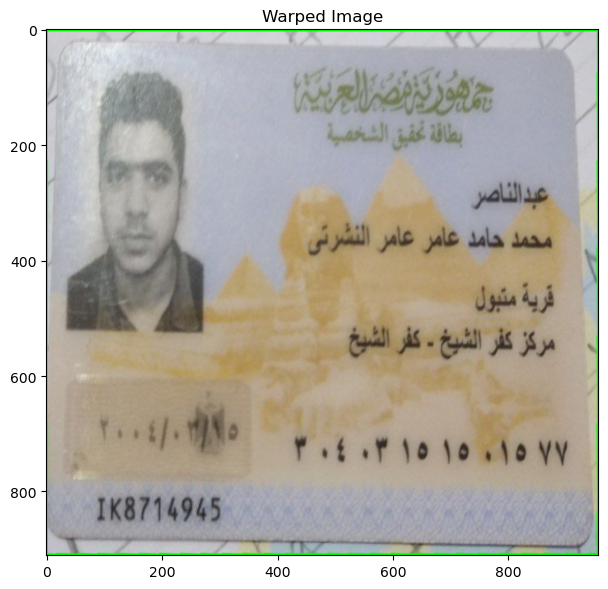

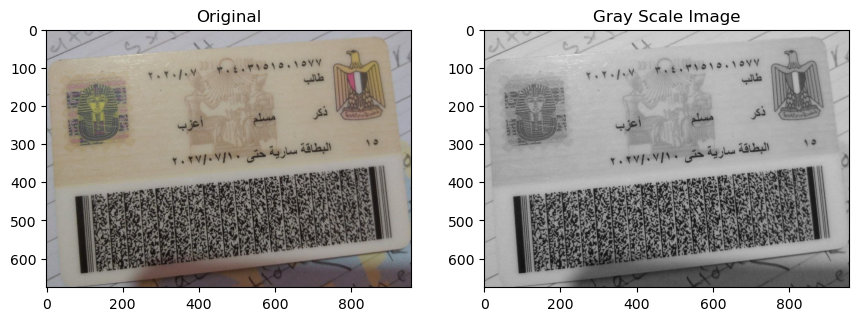

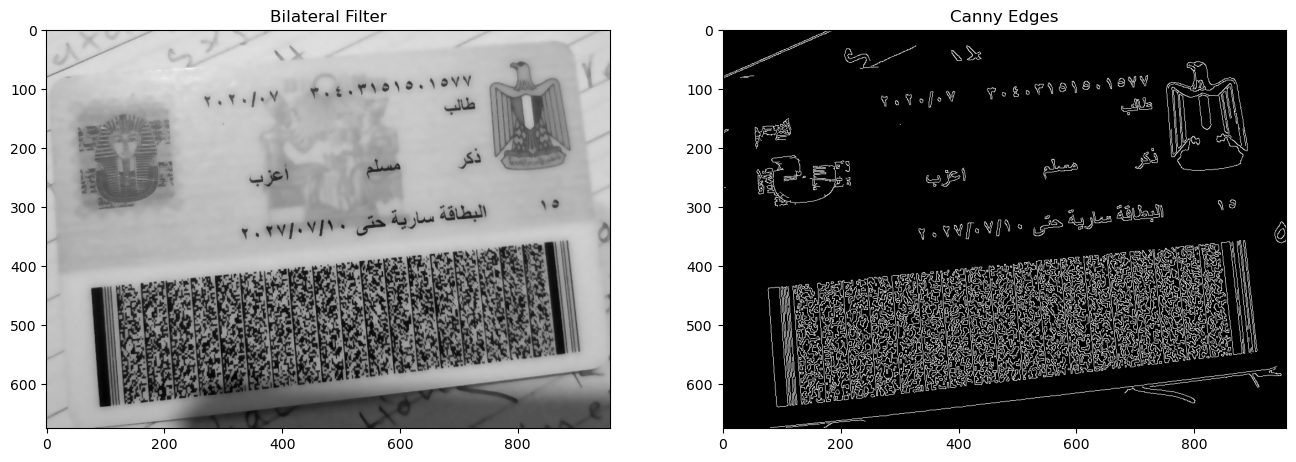

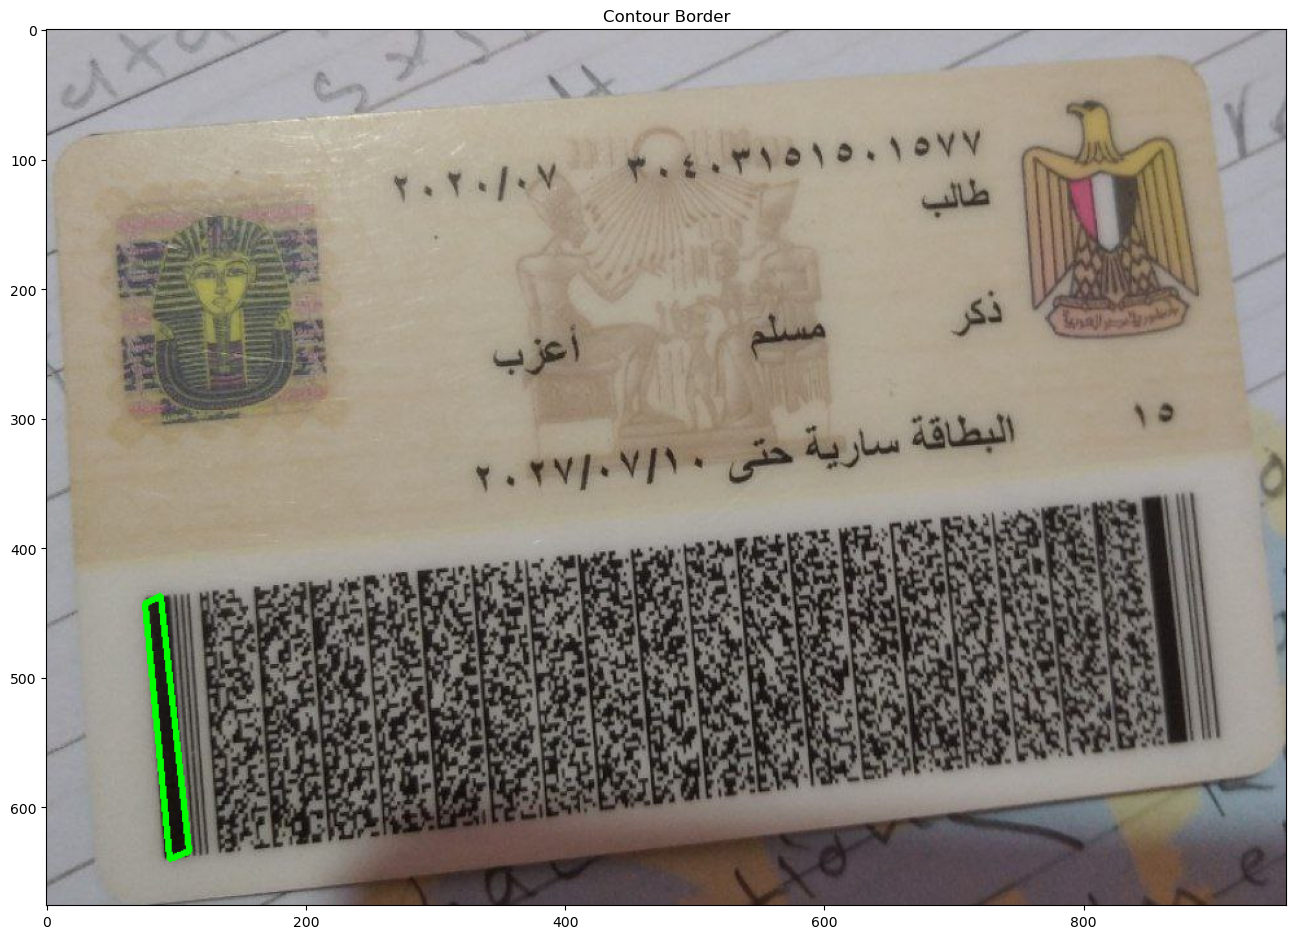

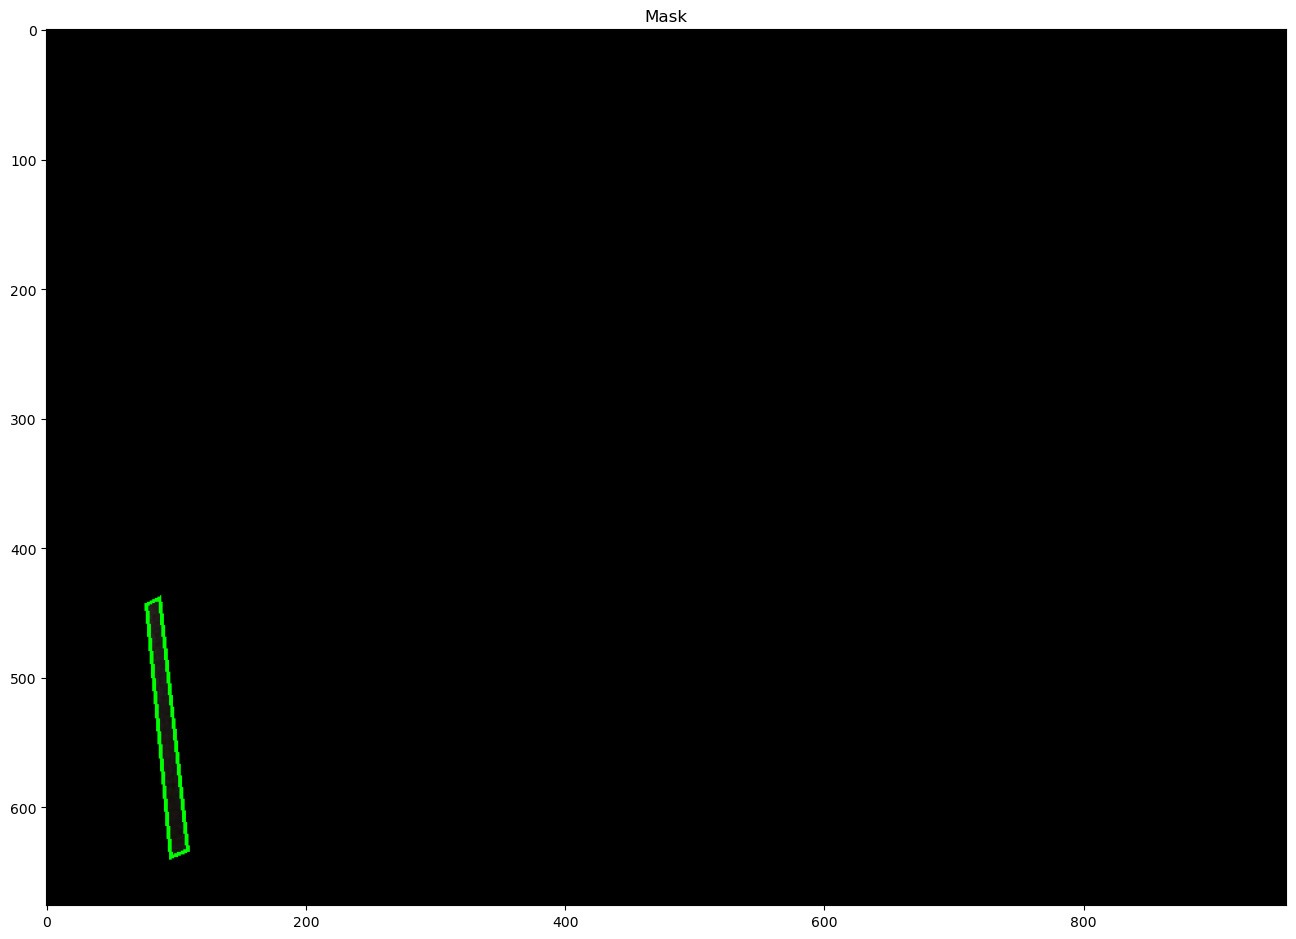

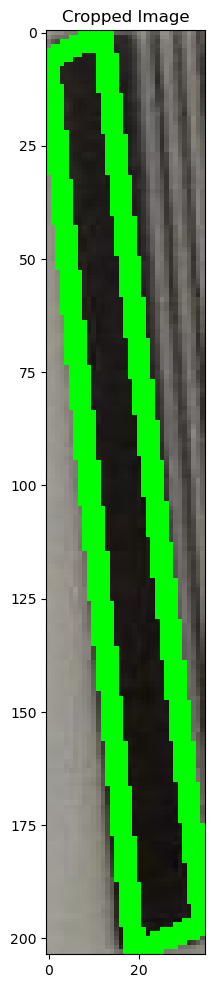

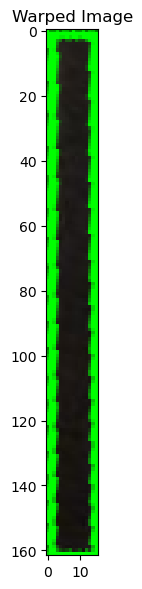

In [67]:
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import pandas as pd

def biggest_contour(contours):
    biggest = np.array([])
    max_area = 0
    for i in contours:
        area = cv2.contourArea(i)
        if area > 1000:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02 * peri, True)
            if area > max_area and len(approx) == 4:
                biggest = approx
                max_area = area
    return biggest

def get_perspective(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure(figsize=(16,12))
    plt.subplot(131), plt.imshow(img), plt.title('Original')
    plt.subplot(132), plt.imshow(gray, 'gray'), plt.title('Gray Scale Image')
    
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    
    plt.figure(figsize=(16,12))
    plt.subplot(121), plt.imshow(bfilter, 'gray'), plt.title('Bilateral Filter')
    plt.subplot(122), plt.imshow(edged, 'gray'), plt.title('Canny Edges')

    contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    biggest = biggest_contour(contours)
    
    if biggest.size == 0:
        adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
        biggest = biggest_contour(contours)
        if biggest.size == 0:
            raise ValueError("No contour with 4 corners found")

    cv2.drawContours(img, [biggest], -1, (0, 255, 0), 3)
    plt.figure(figsize=(16,12))
    plt.imshow(img), plt.title('Contour Border')

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [biggest], -1, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    plt.figure(figsize=(16,12))
    plt.imshow(new_image), plt.title('Mask')

    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = img[x1:x2+1, y1:y2+1]
    
    plt.figure(figsize=(16,12))
    plt.imshow(cropped_image), plt.title('Cropped Image')

    points = biggest.reshape(4, 2)
    input_points = np.zeros((4, 2), dtype="float32")

    points_sum = points.sum(axis=1)
    input_points[0] = points[np.argmin(points_sum)]
    input_points[3] = points[np.argmax(points_sum)]

    points_diff = np.diff(points, axis=1)
    input_points[1] = points[np.argmin(points_diff)]
    input_points[2] = points[np.argmax(points_diff)]

    (top_left, top_right, bottom_right, bottom_left) = input_points
    bottom_width = np.sqrt(((bottom_right[0] - bottom_left[0]) ** 2) + ((bottom_right[1] - bottom_left[1]) ** 2))
    top_width = np.sqrt(((top_right[0] - top_left[0]) ** 2) + ((top_right[1] - top_left[1]) ** 2))
    right_height = np.sqrt(((top_right[0] - bottom_right[0]) ** 2) + ((top_right[1] - bottom_right[1]) ** 2))
    left_height = np.sqrt(((top_left[0] - bottom_left[0]) ** 2) + ((top_left[1] - bottom_left[1]) ** 2))

    max_width = max(int(bottom_width), int(top_width))
    max_height = max(int(right_height * 0.8), int(left_height * 0.8))
    
    converted_points = np.float32([[0, 0], [max_width, 0], [0, max_height], [max_width, max_height]])

    matrix = cv2.getPerspectiveTransform(input_points, converted_points)
    img_output = cv2.warpPerspective(new_image, matrix, (max_width, max_height))
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_output), plt.title('Warped Image')
    plt.tight_layout()

    return img_output

def ocr(img1, img2):
    regions = {
        "id": (img1[1800:1970, 1000:2400]),
        "fname": (img1[600:760, 1600:2400]),
        "lname": (img1[750:1020, 1200:2400]),
        "address": (img1[1080:1600, 600:2400]),
        "bdate": (img1[1750:1940, 130:850]),
        "number": (img1[2160:2300, 200:850]),
        "id2": (img2[90:230, 1106:2050]),
        "pdate": (img2[70:230, 650:1050]),
        "job": (img2[240:670, 520:2050]),
        "gender": (img2[660:830, 1760:2000]),
        "religion": (img2[670:810, 1350:1600]),
        "stutus": (img2[630:810, 740:1150]),
        "exdate": (img2[1040:1190, 770:1320])
    }

    results = {}
    threshold_level = 180

    for region_name, region_image in regions.items():
        if region_image.size == 0:
            raise ValueError(f"Region {region_name} could not be extracted.")
        
        plt.figure()
        gray = cv2.cvtColor(region_image, cv2.COLOR_BGR2GRAY)
        gray = cv2.bilateralFilter(gray, 9, 11, 11)

        if region_name in ['id', 'id2']:
            text = pytesseract.image_to_string(gray, lang='ara_number')
        elif region_name == 'number':
            text = pytesseract.image_to_string(gray, lang='eng')
        elif region_name in ['pdate', 'bdate', 'exdate']:
            text = pytesseract.image_to_string(gray, lang='ara_combined')
        else:
            text = pytesseract.image_to_string(gray, lang='ara_combined')
        
        results[region_name] = text.strip()
        plt.imshow(gray, 'gray')
    
    df = pd.DataFrame(results, index=[0]).T
    df = df.replace('\n', ' ', regex=True)
    
    return df

def main():
    image1 = 'id.jpg'
    image2 = 'idback.jpg'
    img1 = get_perspective(image1)
    img2 = get_perspective(image2)
    df = ocr(img1, img2)
    print(df)

if __name__ == '__main__':
    main()
